### Support Vector Machines (SVM)
- can be used for classification, regression and even outlier detection
- well suited for small and medium sized datasets
- highly affected by feature scales. It is important to apply a scaling technique before fitting a SVM

### Linear SVM - Classification
- Imagine we have a binary classification. This model is called linear because if we plot the training instances, we can draw a straight line and this line can separate the classes.

### Margin and support vectors
- When working with SVM, a key concept is the so-called support vector! Support vector correspond to the closest instances to the fitted straight line. They work as guidance to the model, such that every other instance away from the straight line does not affect decision boundaries!
- Once we have the support vectors, we can subsequentially establish the concept of margin! Margin is the distance between the support vector and the fitted straight line. 
    - One of the main goals when dealing with SVMs is to keep the margin as large as possible, because this can be a sign of good generalization on the validation dataset.

### Hard margin vs soft margin classifiers
- Hard margin classifier has 2 main concerns:
    - 1. Data must be linear separable
    - 2. Affected by outliers (an outlier will probably be the support vector and this will lead to non-generalization or an outlier may turn the creation of a straight line into something impossible since it can be located among the instances of the opposite class)

- To avoid these issues, we have the soft margin classifier. Soft margin classifier allows some margin violations (Some instance may exist within the margin or on the other side of the straight line). 

- Margin violations are bad, however, our goal is to have a model cabaple of generalizing to new instances so some violations can be tolerated.
    - in scikit-learn, the hyperparameter C controls this amount of violations.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import numpy as np

In [ ]:
iris = load_iris()
X = iris['data'][:,(2,3)] #petal width + petal length
y = (iris['target']==2).astype(np.float64) #iris virginica classifier

Hinge loss: https://programmathically.com/understanding-hinge-loss-and-the-svm-cost-function/

In [ ]:
svm_clf = Pipeline([
    ('scaler_tr',StandardScaler()),
    ('svm',LinearSVC(C=1,loss='hinge'))
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler_tr', StandardScaler()),
                ('svm', LinearSVC(C=1, loss='hinge'))])

In [ ]:
svm_clf.predict([[5.5,1.7]])

array([1.])

### Nonlinear SVM Classification
- one way to solve nonlinear separables problems is to add some polynomial features 

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [ ]:
X, y = make_moons(n_samples=100, noise=0.15)

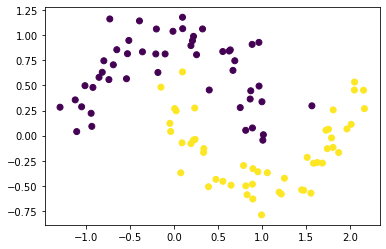

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
poly_svm_clf = Pipeline([
    ('poly_tr',PolynomialFeatures(degree=3)),
    ('scaler_tr',StandardScaler()),
    ('svm',LinearSVC(C=10,loss='hinge',max_iter=100000))
])

poly_svm_clf.fit(X,y)

Pipeline(steps=[('poly_tr', PolynomialFeatures(degree=3)),
                ('scaler_tr', StandardScaler()),
                ('svm', LinearSVC(C=10, loss='hinge', max_iter=100000))])

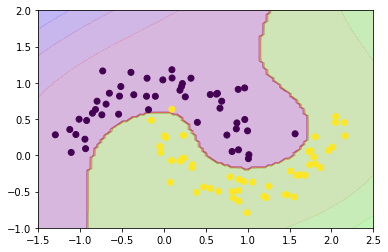

In [ ]:
axes = [-1.5,2.5,-1.0,2.0]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_ = np.c_[x0.ravel(), x1.ravel()]
y_pred = poly_svm_clf.predict(X_).reshape(x0.shape)
y_decision = poly_svm_clf.decision_function(X_).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
plt.scatter(X[:,0],X[:,1],c=y)

### Kernel trick
- instead of creating polynomial features by hand, SVMs can natively create polynomial features in the background and computes the decision function without having to explicity create the polynomial features. This is called kernel trick!

- Kernel trick is not limited to polynomial transformations, but can also be extend to similarity techniques called Radius Basis Function

In [ ]:
from sklearn.svm import SVC
poly_svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('poly_svm',SVC(kernel='poly',C=5, degree=3, coef0=1))
])
poly_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_svm', SVC(C=5, coef0=1, kernel='poly'))])

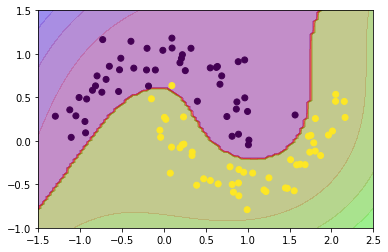

In [ ]:
axes = [-1.5,2.5,-1.0,1.5]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_ = np.c_[x0.ravel(), x1.ravel()]
y_pred = poly_svm_clf.predict(X_).reshape(x0.shape)
y_decision = poly_svm_clf.decision_function(X_).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.3)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=y)

### Similarity Features
- another technique to deal with nonlinear relationships
- it uses a similarity function to create new variables without having to directly create them
- Gaussian RBF (radius basis function) is a common function
- small gamma means smaller region of similarity (prone to overfitting)
    - https://towardsdatascience.com/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a

In [ ]:
rbf_kernel_svm = Pipeline([
    ('scaler',StandardScaler()),
    ('svm',SVC(kernel='rbf',gamma=5,C=0.001))
])

rbf_kernel_svm.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=0.001, gamma=5))])

### Support Vector Regression
- SVM can be also used for regression tasks
- The main difference here is that instead of finding the largest margin possible + have the least margin violations, we now want to fit the largest number of instance as possible within the margin and have the least number of instance outside the margin
- the size of epsilon does not affect the predictions! 

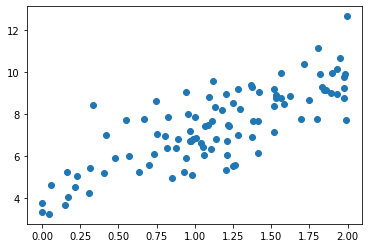

In [ ]:
from sklearn.svm import LinearSVR
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)
plt.scatter(X,y)

In [ ]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y.ravel())

LinearSVR(epsilon=1.5)

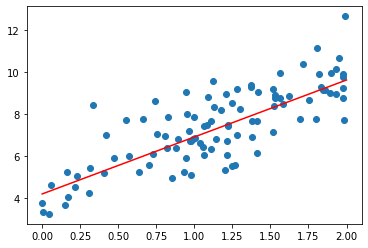

In [ ]:
plt.scatter(X,y)
plt.plot(np.arange(0,3).reshape(-1,1),svm_reg.predict(np.arange(0,3).reshape(-1,1)),'r-')

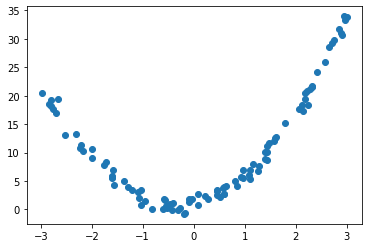

In [ ]:
from sklearn.svm import SVR
X = 6 * np.random.rand(100,1) - 3
y = 3*(X**2) + 2*X + 1 + np.random.randn(100,1)
plt.scatter(X,y)

In [ ]:
svm_reg_kernel = SVR(kernel='poly',degree=2,C=5,epsilon=0.1)
svm_reg_kernel.fit(X,y.ravel())

SVR(C=5, degree=2, kernel='poly')

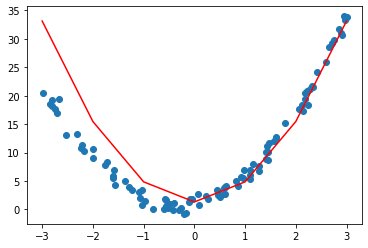

In [ ]:
plt.scatter(X,y)
plt.plot(np.arange(-3,4).reshape(-1,1),svm_reg_kernel.predict(np.arange(-3,4).reshape(-1,1)),'r-')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2b7eb737-18d4-4683-a9e5-3ea902dd423b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>